In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [84]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [85]:
full_csv = pd.read_csv('../data/s9/s9_working.csv')

df = full_csv.copy()

print(f'num cols: {len(df.columns)}')
print(f'num rows: {len(df)}')

df.describe()


num cols: 635
num rows: 201


,outcome,rank,d1_alt_count,d1_ex_cost,d1_ex_length,d1_max_hp,d1_atk,d1_def,d1_dmg_reduction,d1_healing,d1_accuracy,d1_evasion,d1_crit,d1_crit_res,d1_crit_dmg,d1_crit_dmg_res,d1_stability,d1_min_dmg,d1_n_range,d1_cc_power,d1_cc_res,d1_recov_boost,d1_atk_spd,d1_mov_spd,d1_block_rate_bonus,d1_def_piercing,d1_mag_count,d1_na_cost,d2_alt_count,d2_ex_cost,d2_ex_length,d2_max_hp,d2_atk,d2_def,d2_dmg_reduction,d2_healing,d2_accuracy,d2_evasion,d2_crit,d2_crit_res,d2_crit_dmg,d2_crit_dmg_res,d2_stability,d2_min_dmg,d2_n_range,d2_cc_power,d2_cc_res,d2_recov_boost,d2_atk_spd,d2_mov_spd,d2_block_rate_bonus,d2_def_piercing,d2_mag_count,d2_na_cost,d3_alt_count,d3_ex_cost,d3_ex_length,d3_max_hp,d3_atk,d3_def,d3_dmg_reduction,d3_healing,d3_accuracy,d3_evasion,d3_crit,d3_crit_res,d3_crit_dmg,d3_crit_dmg_res,d3_stability,d3_min_dmg,d3_n_range,d3_cc_power,d3_cc_res,d3_recov_boost,d3_atk_spd,d3_mov_spd,d3_block_rate_bonus,d3_def_piercing,d3_mag_count,d3_na_cost,d4_alt_count,d4_ex_cost,d4_ex_length,d4_max_hp,d4_atk,d4_def,d4_dmg_reduction,d4_healing,d4_accuracy,d4_evasion,d4_crit,d4_crit_res,d4_crit_dmg,d4_crit_dmg_res,d4_stability,d4_min_dmg,d4_n_range,d4_cc_power,d4_cc_res,d4_recov_boost,d4_atk_spd,d4_mov_spd,d4_block_rate_bonus,d4_def_piercing,d4_mag_count,d4_na_cost,a1_alt_count,a1_ex_cost,a1_ex_length,a1_max_hp,a1_atk,a1_def,a1_dmg_reduction,a1_healing,a1_accuracy,a1_evasion,a1_crit,a1_crit_res,a1_crit_dmg,a1_crit_dmg_res,a1_stability,a1_min_dmg,a1_n_range,a1_cc_power,a1_cc_res,a1_recov_boost,a1_atk_spd,a1_mov_spd,a1_block_rate_bonus,a1_def_piercing,a1_mag_count,a1_na_cost,a2_alt_count,a2_ex_cost,a2_ex_length,a2_max_hp,a2_atk,a2_def,a2_dmg_reduction,a2_healing,a2_accuracy,a2_evasion,a2_crit,a2_crit_res,a2_crit_dmg,a2_crit_dmg_res,a2_stability,a2_min_dmg,a2_n_range,a2_cc_power,a2_cc_res,a2_recov_boost,a2_atk_spd,a2_mov_spd,a2_block_rate_bonus,a2_def_piercing,a2_mag_count,a2_na_cost,a3_alt_count,a3_ex_cost,a3_ex_length,a3_max_hp,a3_atk,a3_def,a3_dmg_reduction,a3_healing,a3_accuracy,a3_evasion,a3_crit,a3_crit_res,a3_crit_dmg,a3_crit_dmg_res,a3_stability,a3_min_dmg,a3_n_range,a3_cc_power,a3_cc_res,a3_recov_boost,a3_atk_spd,a3_mov_spd,a3_block_rate_bonus,a3_def_piercing,a3_mag_count,a3_na_cost,a4_alt_count,a4_ex_cost,a4_ex_length,a4_max_hp,a4_atk,a4_def,a4_dmg_reduction,a4_healing,a4_accuracy,a4_evasion,a4_crit,a4_crit_res,a4_crit_dmg,a4_crit_dmg_res,a4_stability,a4_min_dmg,a4_n_range,a4_cc_power,a4_cc_res,a4_recov_boost,a4_atk_spd,a4_mov_spd,a4_block_rate_bonus,a4_def_piercing,a4_mag_count,a4_na_cost,ds1_alt_count,ds1_ex_cost,ds1_ex_length,ds1_max_hp,ds1_atk,ds1_def,ds1_healing,ds1_accuracy,ds1_evasion,ds1_crit,ds1_crit_dmg,ds1_stability,ds1_min_dmg,ds1_cc_power,ds1_cc_res,ds1_recov_boost,ds1_atk_spd,ds2_alt_count,ds2_ex_cost,ds2_ex_length,ds2_max_hp,ds2_atk,ds2_def,ds2_healing,ds2_accuracy,ds2_evasion,ds2_crit,ds2_crit_dmg,ds2_stability,ds2_min_dmg,ds2_cc_power,ds2_cc_res,ds2_recov_boost,ds2_atk_spd,as1_alt_count,as1_ex_cost,as1_ex_length,as1_max_hp,as1_atk,as1_def,as1_healing,as1_accuracy,as1_evasion,as1_crit,as1_crit_dmg,as1_stability,as1_min_dmg,as1_cc_power,as1_cc_res,as1_recov_boost,as1_atk_spd,as2_alt_count,as2_ex_cost,as2_ex_length,as2_max_hp,as2_atk,as2_def,as2_healing,as2_accuracy,as2_evasion,as2_crit,as2_crit_dmg,as2_stability,as2_min_dmg,as2_cc_power,as2_cc_res,as2_recov_boost,as2_atk_spd,d1_affinity_indoor_dmg_mult,d1_affinity_indoor_block_r,d2_affinity_indoor_dmg_mult,d2_affinity_indoor_block_r,d3_affinity_indoor_dmg_mult,d3_affinity_indoor_block_r,d4_affinity_indoor_dmg_mult,d4_affinity_indoor_block_r,a1_affinity_indoor_dmg_mult,a1_affinity_indoor_block_r,a2_affinity_indoor_dmg_mult,a2_affinity_indoor_block_r,a3_affinity_indoor_dmg_mult,a3_affinity_indoor_block_r,a4_affinity_indoor_dmg_mult,a4_affinity_indoor_block_r,ds1_affinity_indoor_dmg_mult,ds1_affinity_indoor_block_r,ds2_affinity_indoor_dmg_mult,ds2_affinity_indoor_block_r,as1_affinity_indoor_dmg_mult,as1_affinity_indoor_block_r,as2_affinity_indoor_dmg_mult,as2_affinity_indoo

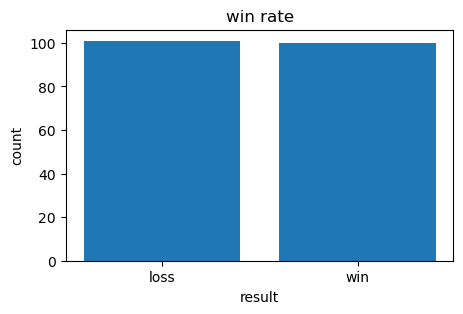

In [86]:
outcome_mat = df.groupby(['outcome']).size()

plt.figure(figsize=(5,3))
plt.bar(["loss", "win"], [outcome_mat.get(0,0), outcome_mat.get(1,0)])
plt.title('win rate')
plt.xlabel('result')
plt.ylabel('count')
plt.savefig('../figures/eda/winr.png')
plt.show()

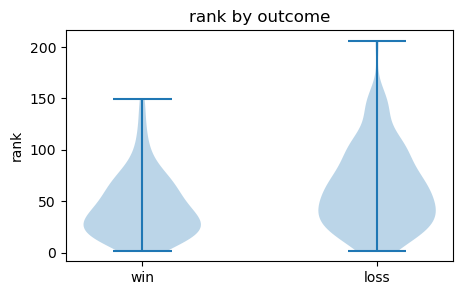

In [87]:
# rank by outcome

dataset = [df[df['outcome'] == 1]['rank'].values, df[df['outcome'] == 0]['rank'].values]

plt.figure(figsize=(5,3))
plt.violinplot(dataset=dataset)
plt.title('rank by outcome')
plt.xticks([1,2],['win', 'loss'])
plt.ylabel('rank')
plt.savefig('../figures/eda/rbo.png')
plt.show()

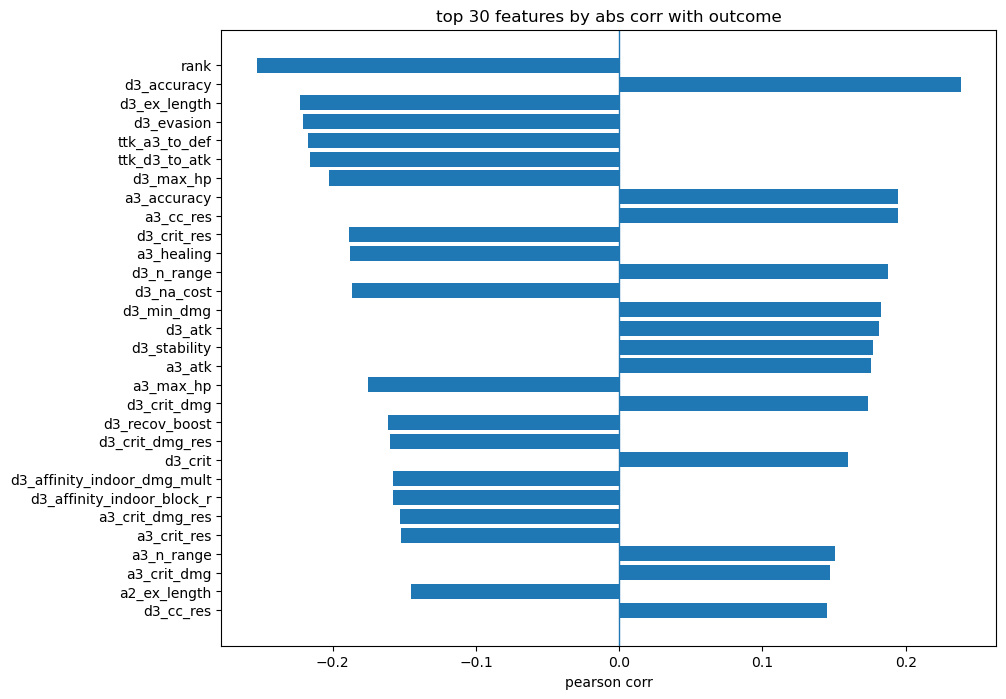

In [88]:
# returns pearson corr of cont vars with outcome
def pearson_corr_with_outcome(df: pd.DataFrame, target: str = 'outcome') -> pd.DataFrame:
    out = df.copy()

    num = out.select_dtypes(include=[np.number]).dropna(subset=[target])
    corrs = num.corr(numeric_only=True)[target].drop(index=target).sort_values(ascending=False)

    out = corrs.to_frame("pearson_corr")
    out["abs_corr"] = out["pearson_corr"].abs()
    out = out.sort_values("abs_corr", ascending=False)

    return out

corr_df = pearson_corr_with_outcome(full_csv, target="outcome")
corr_df.to_csv('../figures/eda/contfeats.csv')

top_30 = corr_df.head(30)

# plot
plt.figure(figsize=(10, 8))
plt.barh(top_30.index[::-1], top_30["pearson_corr"].values[::-1])
plt.axvline(0, linewidth=1)
plt.title(f"top 30 features by abs corr with outcome")
plt.xlabel("pearson corr")
plt.savefig('../figures/eda/contfeats.png')
plt.show()

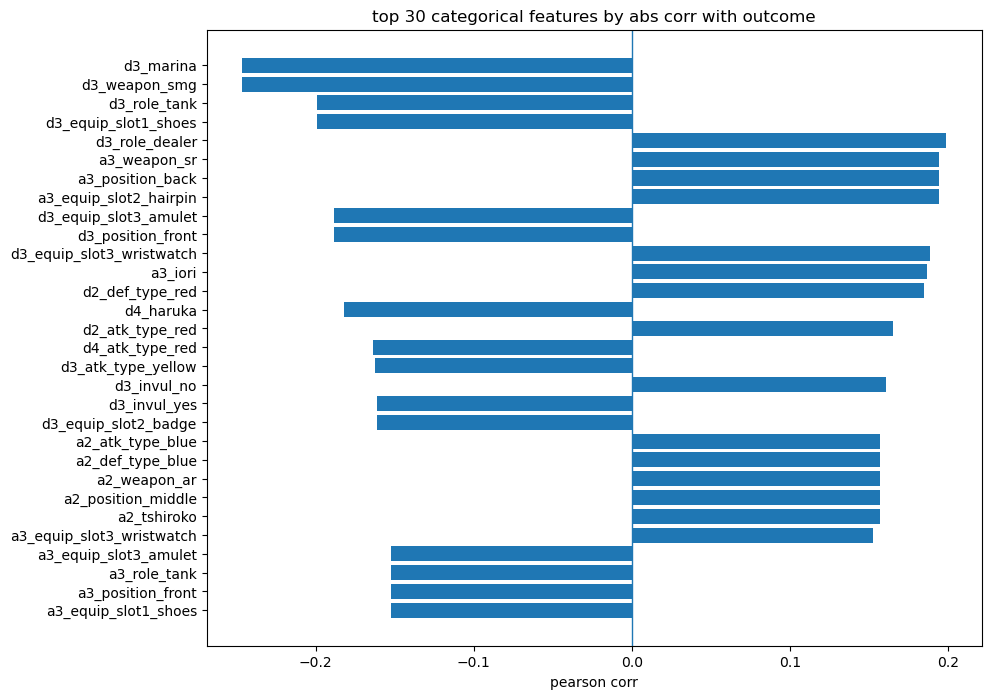

In [89]:
# returns pearson corr of cont vars (ohe) with outcome

def pearson_with_categoricals(df: pd.DataFrame, target="outcome"):
    out = df.copy()

    y = out[target]
    X_cat = out.drop(columns=[target]).select_dtypes(exclude=[np.number])

    X_oh = pd.get_dummies(X_cat)
    joined = pd.concat([y, X_oh], axis=1).dropna(subset=[target])

    corrs = joined.corr(numeric_only=True)[target].drop(index=target)
    out = (corrs.to_frame("pearson_corr")
    .assign(abs_corr=lambda d: d["pearson_corr"].abs())
    .sort_values("abs_corr", ascending=False))

    return out

cat_corrs = pearson_with_categoricals(full_csv, "outcome")
cat_corrs.to_csv('../figures/eda/catfeats.csv')

t30 = cat_corrs.head(30)

# plot
plt.figure(figsize=(10, 8))
plt.barh(t30.index[::-1], t30["pearson_corr"].values[::-1])
plt.axvline(0, linewidth=1)
plt.title(f"top 30 categorical features by abs corr with outcome")
plt.xlabel("pearson corr")
plt.savefig('../figures/eda/catfeats.png')
plt.show()

In [90]:
# missing values

df = df.replace("?", np.nan)

cols_with_missing = df.columns[df.isna().any()].tolist()

print(cols_with_missing)

overall_missing_prop = df.isna().to_numpy().mean()
print("overall missing proportion:", overall_missing_prop)

for col in cols_with_missing:
    prop = df[col].isna().mean()
    cnt  = df[col].isna().sum()
    print(f"{col:40} missing_prop={prop:.3f}  missing_count={cnt}")

['d1_heals_team_or_self', 'd2_heals_team_or_self', 'd3_heals_team_or_self', 'd4_heals_team_or_self', 'a1_heals_team_or_self', 'a2_heals_team_or_self', 'a3_heals_team_or_self', 'a4_heals_team_or_self', 'ds1_def_type', 'ds1_invul', 'ds1_heals_one_or_many', 'ds2_def_type', 'ds2_invul', 'ds2_heals_one_or_many', 'as1_def_type', 'as1_invul', 'as1_heals_one_or_many', 'as2_def_type', 'as2_invul', 'as2_heals_one_or_many', 'ttk_ds1_to_atk_str']
overall missing proportion: 0.023308653582481294
d1_heals_team_or_self                    missing_prop=0.532  missing_count=107
d2_heals_team_or_self                    missing_prop=0.886  missing_count=178
d3_heals_team_or_self                    missing_prop=0.861  missing_count=173
d4_heals_team_or_self                    missing_prop=0.652  missing_count=131
a1_heals_team_or_self                    missing_prop=0.826  missing_count=166
a2_heals_team_or_self                    missing_prop=0.756  missing_count=152
a3_heals_team_or_self                 

/var/folders/1c/h8d9s2m12xl44x37yf7xzw5h0000gn/T/ipykernel_50328/290698500.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("?", np.nan)


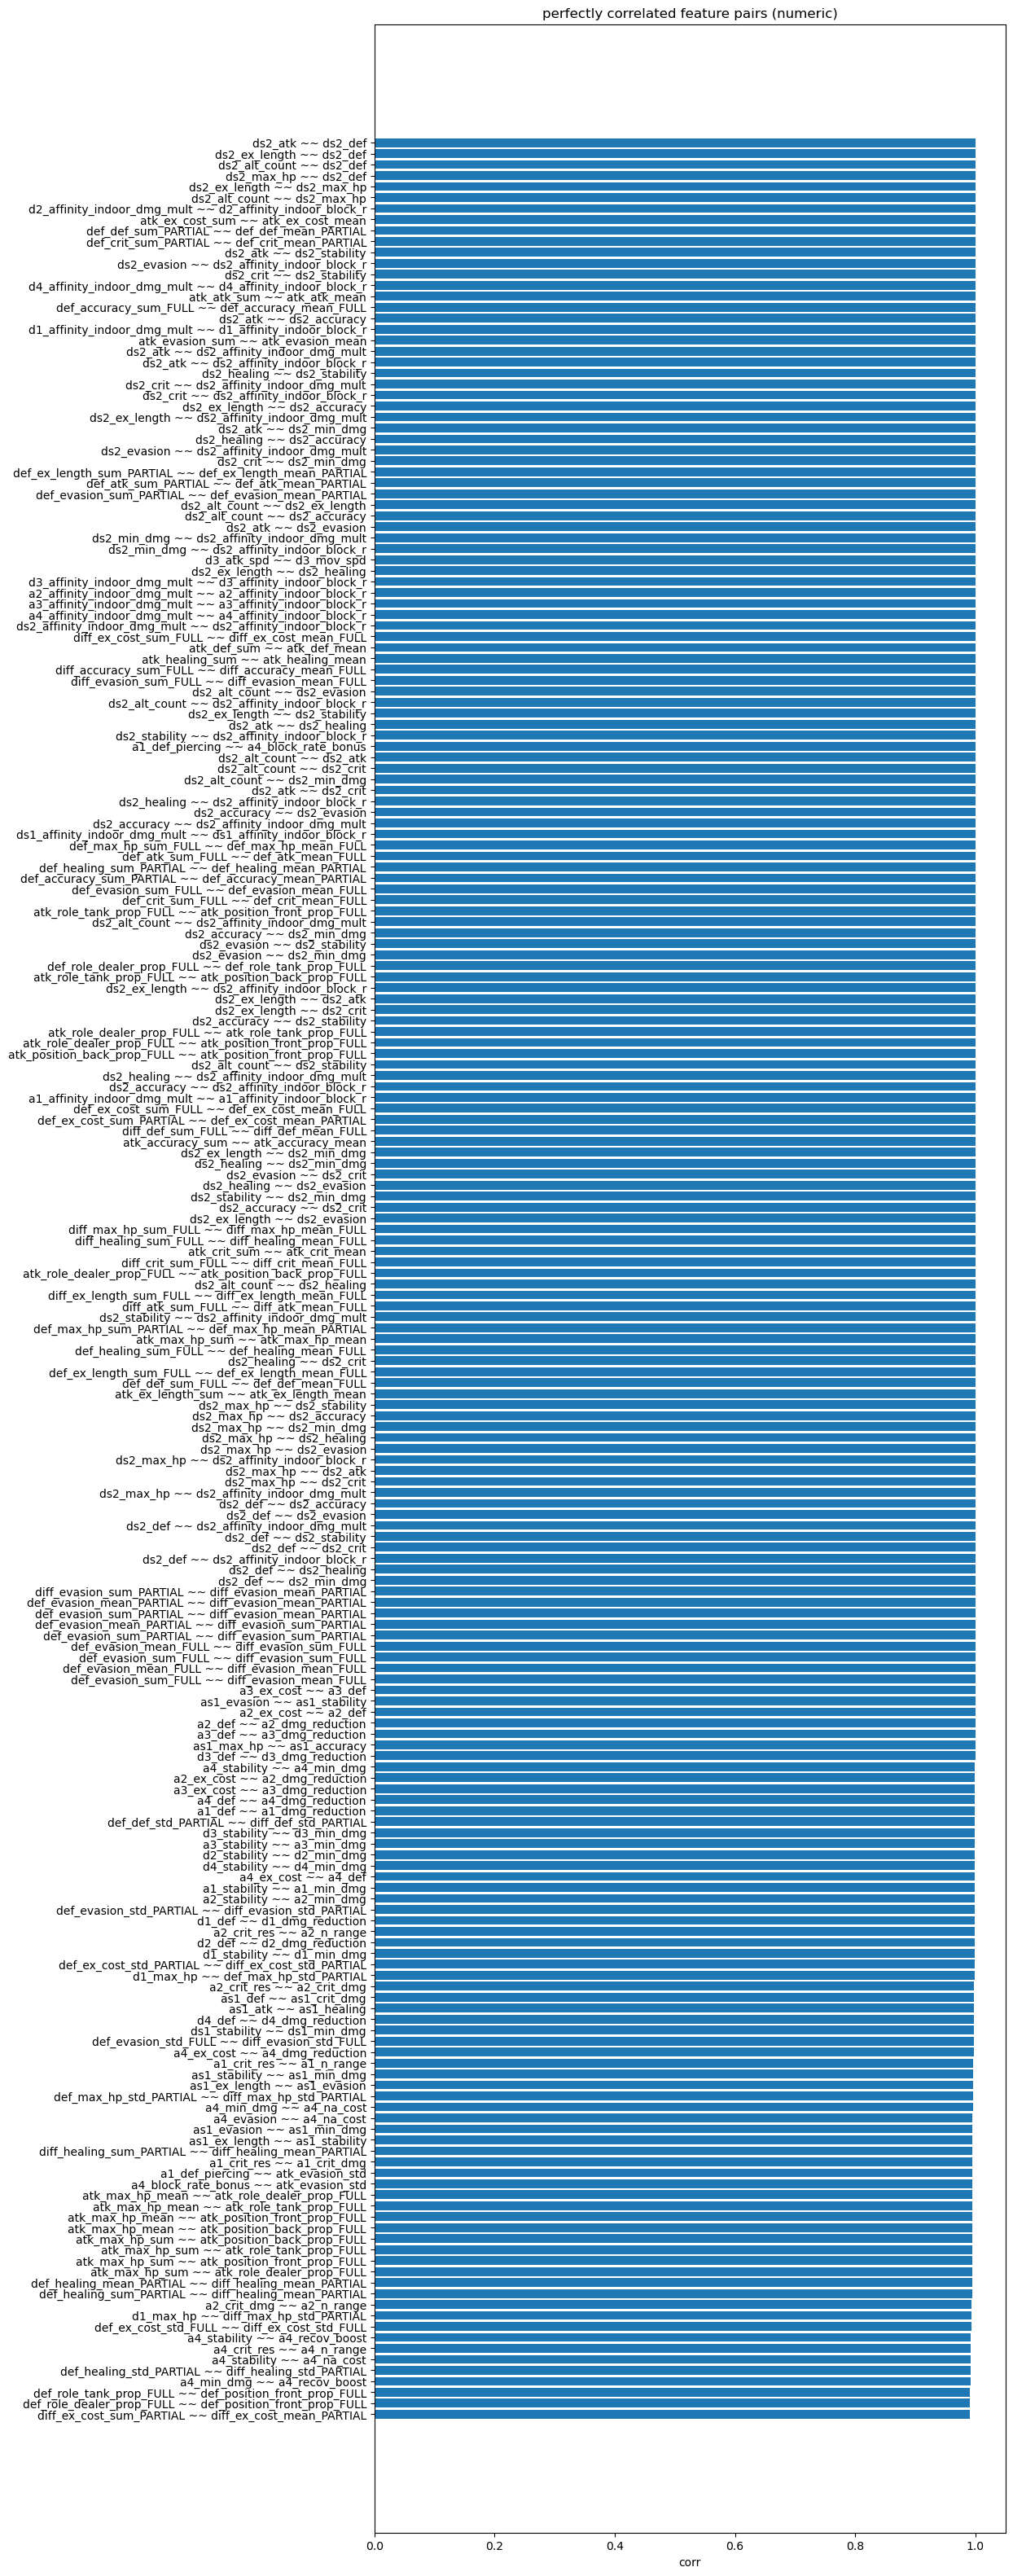

In [91]:
# find toply correlated pairs

def perfect_corr_pairs(df, method="pearson"):
    X = df.select_dtypes(include=[np.number]).copy()
    corr = X.corr(method=method)

    mask = np.triu(np.ones(corr.shape, dtype=bool), k=1)
    s = corr.where(mask).stack()

    s = s[s.abs() >= 0.99]

    out = s.to_frame("corr")
    out["abs_corr"] = out["corr"].abs()
    out = out.sort_values(["abs_corr", "corr"], ascending=[False, False])
    out.index = [f"{a} ~~ {b}" for a, b in out.index]

    return out

pairs = perfect_corr_pairs(full_csv)

plt.figure(figsize=(10, 40))
plt.barh(pairs.index[::-1], pairs["abs_corr"].values[::-1])
plt.xlabel("corr")
plt.title("perfectly correlated feature pairs (numeric)")
plt.show()

In [92]:
# find and drop perfectly correlated groups
def perfect_corr_groups_and_drops(df: pd.DataFrame, thres: float = 0.99,         
    method: str = "pearson",
    exclude: list[str] = None,
    target: str | None = None,
):
    exclude = set(exclude or [])
    X = df.select_dtypes(include=[np.number]).drop(columns=list(exclude), errors="ignore")

    const_cols = [c for c in X.columns if X[c].nunique(dropna=False) <= 1]
    X = X.drop(columns=const_cols, errors="ignore")

    corr = X.corr(method=method).abs()

    cols = corr.columns.to_list()
    n = len(cols)

    parent = list(range(n))
    def find(i):
        while parent[i] != i:
            parent[i] = parent[parent[i]]
            i = parent[i]
        return i
    def union(i, j):
        ri, rj = find(i), find(j)
        if ri != rj:
            parent[rj] = ri

    for i in range(n):
        for j in range(i + 1, n):
            v = corr.iat[i, j]
            if np.isfinite(v) and v >= thres:
                union(i, j)

    groups = {}
    for i, c in enumerate(cols):
        r = find(i)
        groups.setdefault(r, []).append(c)

    groups_list = [g for g in groups.values() if len(g) > 1]

    keep = set()
    drops = set()
    
    for g in groups_list:
        if target is not None and target in df.columns:
            t = pd.to_numeric(df[target], errors="coerce")
            best = None
            best_score = -np.inf
            for c in g:
                cc = pd.to_numeric(df[c], errors="coerce")
                score = cc.corr(t)
                score = 0 if pd.isna(score) else abs(score)
                if score > best_score:
                    best_score = score
                    best = c
            rep = best
        else:
            rep = max(g, key=lambda c: np.nanvar(df[c].to_numpy(dtype=float)))

        keep.add(rep)
        for c in g:
            if c != rep:
                drops.add(c)

    return {
        "groups": groups_list,
        "drop": sorted(drops),
        "repres": sorted(keep),
        "cons": const_cols,
    }

# want to exclude rank (leaking) and partial data (prescout)
l = ['rank'] + [c for c in full_csv.columns if c.endswith('_PARTIAL')]
df = full_csv.drop(columns=l)

# could consider dropping this in future work, but less easy to say if dataset scales
res = perfect_corr_groups_and_drops(df,thres=0.99,exclude=["outcome"],target="outcome")

print("num groups:", len(res["groups"]))
print("drop count:", len(res["drop"]))
print(res["drop"])
print(res['repres'])
print(res['cons'])

num groups: 65
drop count: 94
['a1_affinity_indoor_block_r', 'a1_crit_dmg', 'a1_crit_res', 'a1_def_piercing', 'a1_dmg_reduction', 'a1_stability', 'a2_affinity_indoor_dmg_mult', 'a2_crit_res', 'a2_def', 'a2_dmg_reduction', 'a2_min_dmg', 'a2_n_range', 'a3_affinity_indoor_block_r', 'a3_def', 'a3_ex_cost', 'a3_min_dmg', 'a4_affinity_indoor_dmg_mult', 'a4_block_rate_bonus', 'a4_def', 'a4_dmg_reduction', 'a4_evasion', 'a4_min_dmg', 'a4_n_range', 'a4_na_cost', 'a4_stability', 'as1_def', 'as1_evasion', 'as1_healing', 'as1_max_hp', 'as1_min_dmg', 'as1_stability', 'atk_accuracy_mean', 'atk_atk_sum', 'atk_crit_mean', 'atk_def_mean', 'atk_evasion_mean', 'atk_ex_cost_sum', 'atk_ex_length_sum', 'atk_healing_mean', 'atk_max_hp_sum', 'atk_position_back_prop_FULL', 'atk_position_front_prop_FULL', 'atk_role_dealer_prop_FULL', 'atk_role_tank_prop_FULL', 'd1_affinity_indoor_block_r', 'd1_dmg_reduction', 'd1_stability', 'd2_affinity_indoor_dmg_mult', 'd2_dmg_reduction', 'd2_min_dmg', 'd3_affinity_indoor_dm